In [1]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

 Create the Quantum Circuit

In [2]:
# Create a quantum circuit with 3 qubits and 2 classical bits
qc = QuantumCircuit(3, 2)

Create the Entangled State

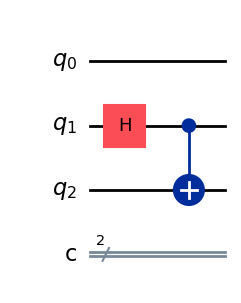

In [3]:
# Create an entangled pair
qc.h(1)
qc.cx(1, 2)
qc.draw('mpl')

Apply the Quantum Gate to Teleport

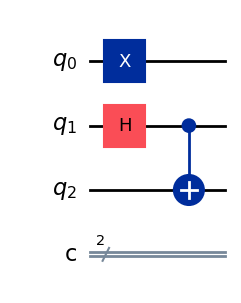

In [4]:
# Apply the gate to the first qubit (the one we want to teleport)
qc.x(0)
qc.draw('mpl')

Perform Bell Measurements

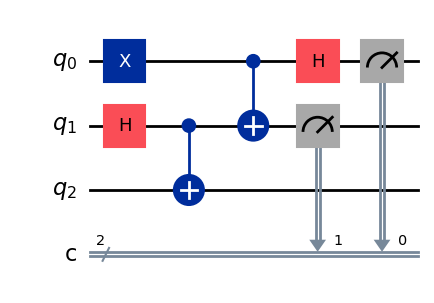

In [5]:
# Perform Bell measurements
qc.cx(0, 1)
qc.h(0)
qc.measure([0, 1], [0, 1])
qc.draw('mpl')

## Bob Adjusts His Qubit
Based on Alice’s measurement results, Bob applies corrections to his qubit (2).

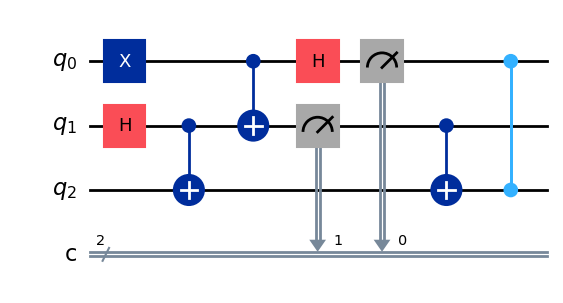

In [6]:
# Apply corrections based on measurement results
qc.cx(1, 2)
qc.cz(0, 2)
qc.draw('mpl')

Complete the Circuit and Simulate

In [7]:
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)


Total count for each state are:
 {'01': 252, '00': 242, '10': 249, '11': 281}


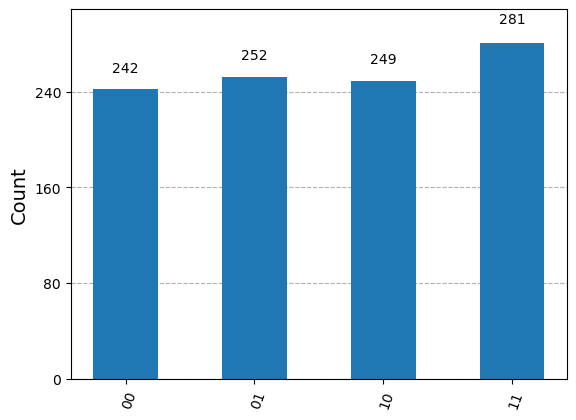

In [8]:
# Run the simulation
job = simulator.run(compiled_circuit)
result = job.result()

# Get and print the results
counts = result.get_counts(compiled_circuit)
print("\nTotal count for each state are:\n", counts)
plot_histogram(counts)